In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

In [63]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [64]:
client_df = pd.read_csv('Clientes_descripcion.txt',delimiter='|',header=None)
movies_df = pd.read_csv('Peliculas_descripcion.txt', delimiter='|', header=None)
rating_df = pd.read_csv('Peliculas_Clientes.txt', delim_whitespace=True, header=None)

client_df = client_df.drop(client_df.iloc[:,4:5], axis=1)
movies_df = movies_df.drop(movies_df.iloc[:,3:5], axis=1)
movies_df = movies_df.drop(movies_df.iloc[:,3:], axis=1)
rating_df = rating_df.drop(rating_df.iloc[:,3:4], axis=1)

client_columns = ['id','age','sex','profession']
client_df.columns = client_columns

movies_columns = ['id','name','release_date']
movies_df.columns = movies_columns

rating_columns = ['user_id','movie_id','rating']
rating_df.columns = rating_columns

client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          943 non-null    int64 
 1   age         943 non-null    int64 
 2   sex         943 non-null    object
 3   profession  943 non-null    object
dtypes: int64(2), object(2)
memory usage: 29.6+ KB


In [65]:
rating_matrix = rating_df.pivot_table(index='movie_id', columns='user_id', values='rating')

rating_matrix.index = movies_df.set_index('id')['name']
rating_matrix


user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
name,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
GoldenEye (1995),3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
Four Rooms (1995),4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Get Shorty (1995),3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
Copycat (1995),3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mat' i syn (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B. Monkey (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sliding Doors (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
evalMovie = rating_matrix.apply(lambda x: x.count(), axis=1)
evalMovie = evalMovie.sort_values(ascending=False)
evalMovie

name
Star Wars (1977)                                      583
Contact (1997)                                        509
Fargo (1996)                                          508
Return of the Jedi (1983)                             507
Liar Liar (1997)                                      485
                                                     ... 
Hungarian Fairy Tale, A (1987)                          1
Death in the Garden (Mort en ce jardin, La) (1956)      1
Every Other Weekend (1990)                              1
Baton Rouge (1988)                                      1
Scream of Stone (Schrei aus Stein) (1991)               1
Length: 1682, dtype: int64

In [67]:
evalUser = rating_matrix.apply(lambda x: x.count(), axis=0)
evalUser = evalUser.sort_values(ascending=False)
evalUser

user_id
405    737
655    685
13     636
450    540
276    518
      ... 
685     20
475     20
36      20
732     20
596     20
Length: 943, dtype: int64

In [68]:
#Reemplazar los valores nulos por el promedio de la fila
# Calcular el promedio de cada fila
row_means = rating_matrix.mean(axis=1)

# Reemplazar los valores nulos por el promedio de la fila
rating_matrix = rating_matrix.fillna(row_means, axis=0)


#1. Filtrar las películas y usuarios para quedarnos sólo con:
#50 películas (las 50 que tengan mayor número de evaluaciones)

top_movies = evalMovie.head(50).index.tolist()

# Filtrar películas y usuarios en rating_matrix
filtered_matrix = rating_matrix.loc[top_movies,:]
filtered_matrix = filtered_matrix.loc[:,filtered_matrix.notna().any()]

# Imprimir la matriz filtrada
filtered_matrix




user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
name,,,,,,,,,,,,,,,,,,,,,
Star Wars (1977),5.0,5.0,NaN,5.0,4.0,4.0,5.0,5.0,5.0,5.0,...,5.0,NaN,4.0,5.0,5.0,NaN,4.0,NaN,5.0,4.0
Contact (1997),5.0,3.0,2.0,5.0,NaN,2.0,4.0,5.0,NaN,NaN,...,NaN,NaN,3.0,4.0,5.0,4.0,5.0,4.0,4.0,NaN
Fargo (1996),5.0,5.0,NaN,NaN,5.0,5.0,5.0,NaN,NaN,5.0,...,4.0,3.0,4.0,3.0,5.0,NaN,3.0,NaN,NaN,5.0
Return of the Jedi (1983),5.0,NaN,4.0,NaN,5.0,NaN,3.0,4.0,NaN,NaN,...,4.0,4.0,4.0,NaN,5.0,NaN,3.0,5.0,NaN,4.0
Liar Liar (1997),NaN,1.0,2.0,5.0,NaN,2.0,1.0,3.0,4.0,3.0,...,NaN,NaN,3.0,1.0,NaN,NaN,4.0,4.0,NaN,NaN
"English Patient, The (1996)",NaN,4.0,NaN,NaN,NaN,2.0,4.0,NaN,5.0,4.0,...,4.0,5.0,5.0,4.0,3.0,NaN,3.0,NaN,NaN,NaN
Scream (1996),NaN,3.0,2.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
Toy Story (1995),5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
Air Force One (1997),NaN,4.0,2.0,5.0,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,4.0,3.0,4.0,3.0,NaN,5.0,4.0,5.0,NaN


In [69]:
#100 usuarios (los 100 que hayan realizado el mayor número de evaluaciones)

top_users = evalUser.head(100).index.tolist()
# Filtrar películas y usuarios en rating_matrix
filtered_matrix = rating_matrix.loc[top_movies,:]
filtered_matrix = filtered_matrix.loc[:,top_users]

# Imprimir la matriz filtrada
filtered_matrix

user_id,405,655,13,450,276,416,537,303,234,393,...,184,788,314,666,894,506,932,886,798,244
name,,,,,,,,,,,,,,,,,,,,,
Star Wars (1977),5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,...,4.0,NaN,NaN,3.0,4.0,5.0,NaN,5.0,5.0,5.0
Contact (1997),NaN,2.0,4.0,4.0,5.0,5.0,4.0,4.0,2.0,4.0,...,3.0,4.0,NaN,4.0,4.0,4.0,NaN,NaN,4.0,5.0
Fargo (1996),NaN,3.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,1.0,...,5.0,5.0,NaN,4.0,4.0,NaN,5.0,4.0,NaN,4.0
Return of the Jedi (1983),5.0,3.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0,4.0,...,4.0,NaN,NaN,2.0,NaN,5.0,NaN,5.0,5.0,4.0
Liar Liar (1997),NaN,3.0,2.0,4.0,4.0,4.0,1.0,4.0,3.0,4.0,...,NaN,3.0,5.0,3.0,NaN,4.0,NaN,NaN,NaN,4.0
"English Patient, The (1996)",NaN,3.0,3.0,4.0,NaN,5.0,3.0,5.0,3.0,NaN,...,4.0,5.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN
Scream (1996),5.0,3.0,1.0,3.0,4.0,5.0,2.0,4.0,3.0,3.0,...,NaN,NaN,5.0,3.0,3.0,NaN,NaN,4.0,NaN,NaN
Toy Story (1995),NaN,2.0,3.0,4.0,5.0,5.0,2.0,5.0,3.0,3.0,...,4.0,3.0,5.0,NaN,4.0,NaN,4.0,4.0,4.0,4.0
Air Force One (1997),NaN,3.0,1.0,4.0,4.0,4.0,1.0,1.0,3.0,NaN,...,NaN,5.0,NaN,3.0,4.0,3.0,NaN,NaN,NaN,NaN


In [70]:
#2. Generar un mapa de películas con PCA (asignando las evaluaciones no hechas con un valor de 3, o con el promedio de evaluación de cada la película)

# Mapa de películas con PCA
pca = PCA(n_components=2)
pca.fit(rating_matrix)
pca_data = pca.transform(rating_matrix)

# Crear un dataframe con los datos del PCA
pca_df = pd.DataFrame(pca_data, index=rating_matrix.index, columns=['PC1','PC2'])

# Graficar el mapa de películas
plt.figure(figsize=(10,10))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.show()




ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#3. Generar un mapa de películas con MDS (calculando distancias entre evaluaciones, pero sólo tomando en cuenta las evaluaciones válidas)

# Mapa de películas con MDS
mds = MDS(n_components=2, dissimilarity='precomputed')
mds.fit(rating_matrix)
mds_data = mds.transform(rating_matrix)

# Crear un dataframe con los datos del MDS
mds_df = pd.DataFrame(mds_data, index=rating_matrix.index, columns=['PC1','PC2'])

# Graficar el mapa de películas
plt.figure(figsize=(10,10))
sns.scatterplot(x='PC1', y='PC2', data=mds_df)
plt.show()



In [ ]:
rating_temp = rating_df.pivot_table(index='movie_id', columns='user_id', values='rating')

rating_temp.index = movies_df.set_index('id')['name']
rating_temp

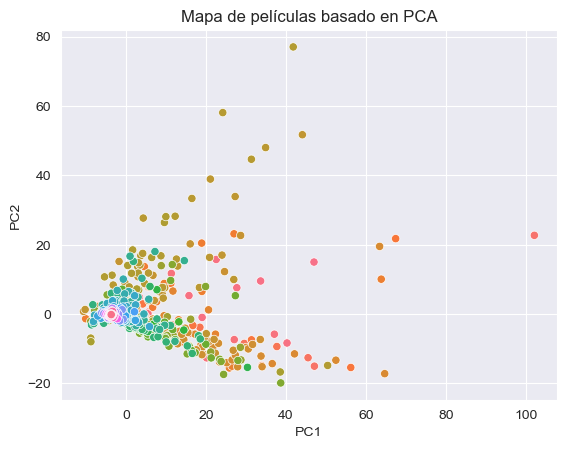

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Reemplazar valores nulos con 3
filled_matrix = rating_temp.fillna(3)

# O reemplazar valores nulos con el promedio de cada película
# filled_matrix = rating_matrix.apply(lambda x: x.fillna(x.mean()), axis=0)

# Estandarizar la matriz
scaler = StandardScaler()
standardized_matrix = scaler.fit_transform(filled_matrix)

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
pca_result = pca.fit_transform(standardized_matrix)

# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['movie'] = rating_matrix.index

# Visualizar los datos en un gráfico de dispersión
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='movie', legend=False)
plt.title('Mapa de películas basado en PCA')
plt.show()


In [71]:
from scipy.spatial.distance import pdist, squareform

# Calcular la matriz de distancias
distances = pdist(filtered_matrix.T, metric='euclidean')

# Convertir la matriz de distancias en una matriz de similaridades
similarities = 1 / (1 + squareform(distances))

# Aplicar MDS para reducir la dimensionalidad
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_result = mds.fit_transform(similarities)

# Crear un DataFrame con los resultados de MDS
mds_df = pd.DataFrame(data=mds_result, columns=['x', 'y'])
mds_df['movie'] = filtered_matrix.columns

# Visualizar los datos en un gráfico de dispersión
sns.scatterplot(data=mds_df, x='x', y='y', hue='movie', legend=False)
plt.title('Mapa de películas basado en evaluaciones válidas')
plt.show()


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').